In [1]:
!pwd

/Users/au263437/workspace/py/HandsOnSignalAnalysisWPython


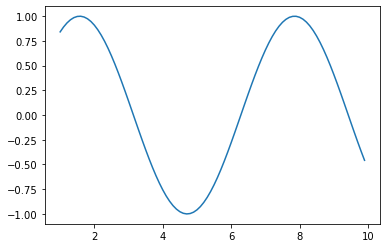

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(1,10,0.1)
y = np.sin(t)
plt.plot (t,y)


# Chapter 4 - Data display

A clean pythonic style exmaple

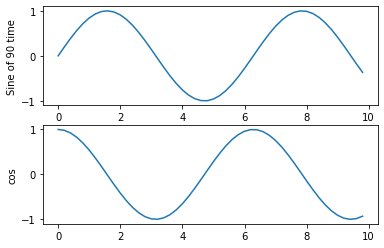

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,10,0.2)
y = np.sin(x)
z = np.cos(x)

# generate fig and axes
fig, axs = plt.subplots(nrows=2,ncols=1)

# plot and labels
axs[0].plot(x,y)
axs[0].set_ylabel(f'Sine of {len(t)} time')

axs[1].plot(x,z)
axs[1].set_ylabel('cos')

# show plots
plt.show()


In [6]:
!pwd

/Users/au263437/workspace/py/HandsOnSignalAnalysisWPython


In [7]:
pwd

'/Users/au263437/workspace/py/HandsOnSignalAnalysisWPython'

In [4]:
""" Solution to Exercise 'Plotting Data', 'Data Display' """

# author:   Thomas Haslwanter
# date:     April-2021

# Import the required packages
import numpy as np
import matplotlib.pyplot as plt


def plot_data(num_cycles:float=1, freq:float=1) -> None:
    """Calculate and plot a sine wave.
    
    Parameters
    ----------
    num_cycles: Number of cycles
    freq : Frequency of oscillation [Hz] 
           
    Examples
    --------
    plot_data(5, 0.3)
    """
               
    # Set the parameters
    amp = 1
    rate = 100       # [Hz]
    noise_amp = 0.5
    
    # Calculate the data
    dt = 1/rate
    omega = 2*np.pi*freq
    t_cycle = 1/freq
    
    t = np.arange(0, num_cycles*t_cycle, dt)
    x = amp * np.sin(omega*t) + noise_amp*np.random.randn(len(t))
    
    # Plot the data
    plt.plot(t, x);
    plt.xlabel('Time [s]');
    plt.ylabel('Signal');
    plt.title('Noisy Sine');
    
    plt.show()    
    return x
    

    

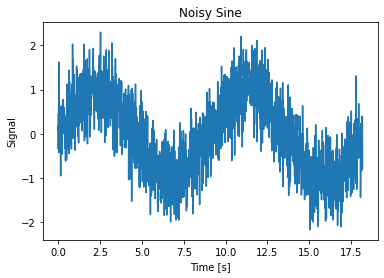

In [5]:
x = plot_data(2, 0.11)



# Chapter 5


## Linear filters
**IIR** and **FIR** filters

## FIR filter
A Finitie impulse response filter has the form

$\sum_{i=0}^{m}b_i*x(n-i)$

witb *b* being filter coefficients<br>
A **FIR** filter is a filter the averages the inputs using the filter coefficients

![FIR](./img/FIR.png)


In [6]:
import numpy as np
import scipy.signal as sig

w = np.ones(3)/3
w6 = np.ones(6)/6

y = sig.lfilter(w,1,x)
y6 = sig.lfilter(w6,1,x)


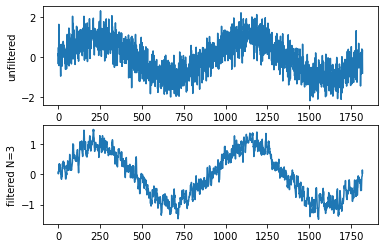

In [7]:

# generate fig and axes
fig, axs = plt.subplots(nrows=2,ncols=1)

# plot and labels
axs[0].plot(x)
axs[0].set_ylabel("unfiltered")

axs[1].plot(y6)
axs[1].set_ylabel('filtered N=3')

# show plots
plt.show()
#plt.plot(x)

## IIR filter
Since the Infinite Impulse Response filter is fed back from the output, its mathematically more efficient

$y(n) =\alpha * x(n) + (1-\alpha)*y(n-1) $

The IIR filter can be represented schematically as in the figure below, as *Direct Form 1*
![IIR](./img/IIR.png)



In [52]:
def x_gen(num_cycles:float=1, freq:float=1, noise_amp:float=0.5) -> None:

    # Set the parameters
    amp = 1
    rate = 100       # [Hz]
    #noise_amp = 0.5

    # Calculate the data
    dt = 1/rate
    omega = 2*np.pi*freq
    t_cycle = 1/freq

    t = np.arange(0, num_cycles*t_cycle, dt)
    x = amp * np.sin(omega*t) + noise_amp*np.random.randn(len(t))

    # Plot the data
    plt.plot(t, x);
    plt.xlabel('Time [s]');
    plt.ylabel('Signal');
    plt.title(f'Noisy Sine { 100*noise_amp} %');

    plt.show()  
    return x,t

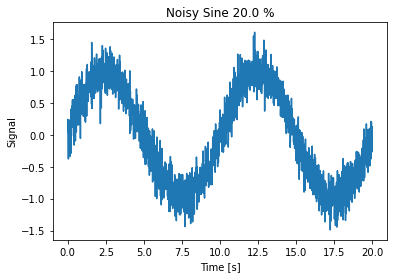

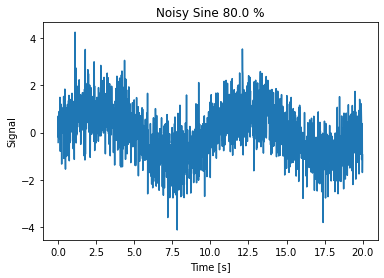

In [53]:
x1,t = x_gen(2,0.1,0.2)
x2,t = x_gen(2,0.1,0.8)

In [34]:
def do_IIR(alpha,x):
    # IIR coeffs for exponentian averaging filter
    a = [1,-(1-alpha)]
    #a = np.array(a)
    b = [alpha]

    y = sig.lfilter(b,a,x)
    return y

## Filter with \$\alpha = 0.1$ 

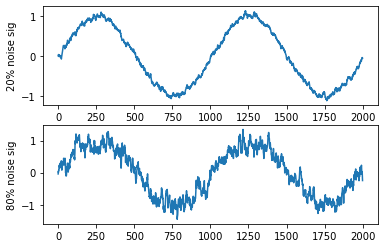

In [55]:
#Filter with Alpha 0,3
f10 = do_IIR(0.1,x1)
f11 = do_IIR(0.1,x2)

# plot and labels
fig, axs = plt.subplots(nrows=2,ncols=1)

axs[0].plot(f10)
axs[0].set_ylabel("20% noise sig")

axs[1].plot(f11)
axs[1].set_ylabel('80% noise sig')

plt.show()

## Filter with \$\alpha = 0.8$ 


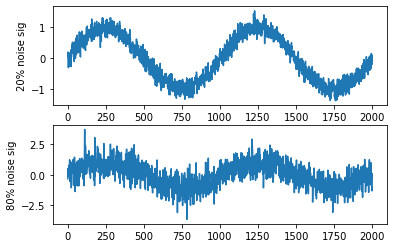

In [54]:
#Filter with Alpha 0,3
f20 = do_IIR(0.8,x1)
f21 = do_IIR(0.8,x2)

# plot and labels
fig, axs = plt.subplots(nrows=2,ncols=1)

axs[0].plot(f20)
axs[0].set_ylabel("20% noise sig")

axs[1].plot(f21)
axs[1].set_ylabel('80% noise sig')

plt.show()

In [23]:
alpha = 0.3

# IIR coeffs for exponentian averaging filter
a = [1,-(1-alpha)]
#a = np.array(a)
b = [alpha]

y = sig.lfilter(b,a,x)


# IIR coeffs for exponentian averaging filter
alpha = 0.05

a = [1,-(1-alpha)]
#a = np.array(a)
b = [alpha]

y2 = sig.lfilter(b,a,x)

## Impulse responses FIR vs IIR

Saved file FIRvsIIR.jpg


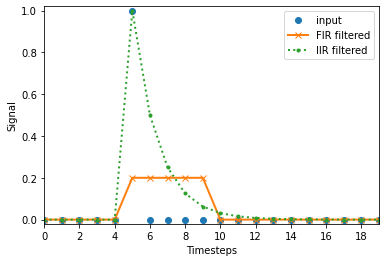

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

# X AND time axis
xx = np.zeros(200)
xx[5]=1
tt = np.arange(200)

# Put result into dict
data = {}
data['before'] = xx
data['after FIR'] = sig.lfilter(np.ones(5)/5,1,xx)
data['after IIR'] = sig.lfilter([1],[1,-0.5],xx)

# plot results
plt.plot(tt[0:20],data['before'][0:20],'o',label='input',lw=2)
plt.plot(tt[0:20],data['after FIR'][0:20],'x-',label='FIR filtered',lw=2)
plt.plot(tt[0:20],data['after IIR'][0:20],'.:',label='IIR filtered',lw=2)

# Foramat plot
plt.xlabel('Timesteps')
plt.ylabel('Signal')
plt.legend()
plt.xticks(np.arange(0,200,2))
plt.gca().margins(x=0,y=0.02)

# Save fig
out_file = 'FIRvsIIR.jpg'
plt.savefig(out_file,dpi=200,quality=90)
print(f'Saved file {out_file}')
plt.show()


In [76]:
#IIR data newer fully decays to zero
data['after IIR']

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 5.00000000e-01, 2.50000000e-01,
       1.25000000e-01, 6.25000000e-02, 3.12500000e-02, 1.56250000e-02,
       7.81250000e-03, 3.90625000e-03, 1.95312500e-03, 9.76562500e-04,
       4.88281250e-04, 2.44140625e-04, 1.22070312e-04, 6.10351562e-05])

In [77]:
#FIR data get averaged over 5 periods
data['after FIR']

array([0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. ])

## Morphological filters
Linear filters are good at supressing noise that has a gaussian distributions, 

Text(0.5, 1.0, 'Signal with 20% noise')

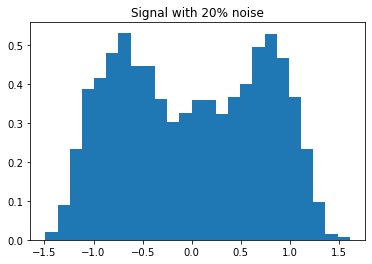

In [56]:
plt.hist(x1,bins=25,density=True)
plt.title("Signal with 20% noise")

Text(0.5, 1.0, 'Signal with 80% noise')

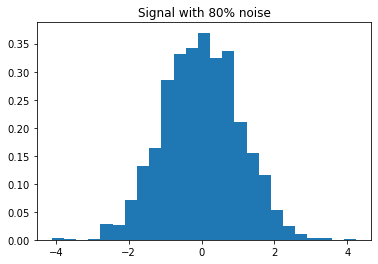

In [57]:
plt.hist(x2,bins=25,density=True)
plt.title("Signal with 80% noise")

Lets try a median filter

In [95]:
x

array([0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 1., 1., 1., 1., 1., 3., 1.,
       1., 1., 1.])

Image saved to MedianFilter.jpg


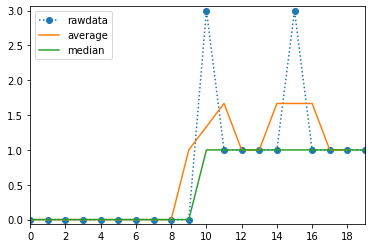

In [58]:
""" Effects Linear and non-linear filters on data with extreme outliers """

# Import the standard packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Create the data
x = np.zeros(20)
x[10:] = 1

# Add some noise-spikes
x[[10,15]] = 3

# Median filter the signal
x_med = signal.medfilt(x, 3)

# Average filtered data
b = np.ones(3)/3
x_filt = signal.lfilter(b, 1, x)

# Plot the data
plt.plot(x, 'o', linestyle='dotted', label='rawdata')
plt.plot(x_filt[1:], label='average')
plt.plot(x_med, label='median')

plt.xlim([0, 19])
plt.xticks(np.arange(0,20,2))
plt.legend()

ax = plt.gca()
ax.margins(x=0, y=0.02)

# Save and show the image
out_file = 'MedianFilter.jpg'
plt.savefig(out_file, dpi=200, quality=90)
print(f'Image saved to {out_file}')

plt.show()

In [74]:
# aplly the media filter to the noisy signal
# Average filtered data
b = np.ones(5)/5
x_filt = signal.lfilter(b, 1, x)

x1_median_filt = signal.lfilter(b, 1, x1)
x1_IIR08_filt = do_IIR(0.8,x1)


In [75]:
def plot3():
    #Filter with Alpha 0,3
    # plot and labels
    fig, axs = plt.subplots(nrows=3,ncols=1)

    axs[0].plot(x1)
    axs[0].set_ylabel("Raw")

    axs[1].plot(x1_median_filt)
    axs[1].set_ylabel('Median filter')

    # alpha 0.8 IIR filter
    axs[2].plot(x1_IIR08_filt)
    axs[2].set_ylabel("Alpha 0.8noise sig")

    plt.show()

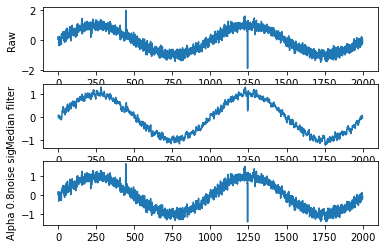

In [76]:
plot3()

## Add a coupkle of outliers

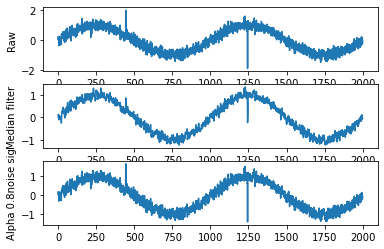

In [73]:
len(x1)
x1[444]=2.0
x1[1244]=-1.9

# aplly the media filter to the noisy signal
x1_median_filt = signal.lfilter(b, 1, x1)
x1_IIR08_filt = do_IIR(0.8,x1)

plot3()

In [96]:
data

{'before': array([0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 1., 1., 1., 1., 1., 3., 1.,
        1., 1., 1.]),
 'after MEDIAN': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.]),
 'after FIR': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 1.        , 0.        , 0.        ,
        0.33333333, 0.66666667, 1.        , 1.        , 1.        ,
        1.66666667, 1.66666667, 1.66666667, 1.        , 1.        ])}

In [104]:
!pwd

/Users/au263437/workspace/py/HandsOnSignalAnalysisWPython


In [107]:
import sys
sys.path.append('sapy/src/figures/')
sys.path.append('sapy/src/listings/')

In [108]:
import F5_filter_characteristics as f5

f5.freq_response()

In [116]:
#w = sig.savgol_coeffs(window_length=5,polyorder=2,deriv=0)
w = sig.savgol_coeffs(window_length=7,polyorder=5,deriv=0)
w

array([ 0.02164502, -0.12987013,  0.32467532,  0.56709957,  0.32467532,
       -0.12987013,  0.02164502])

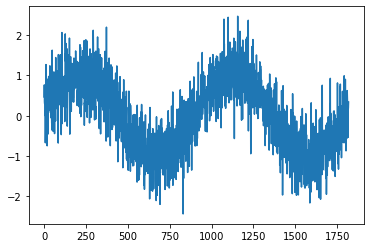

In [113]:

plt.plot(x)

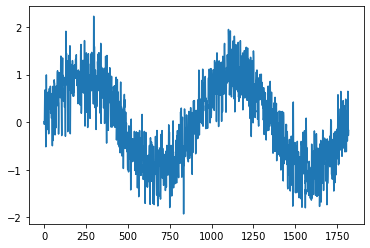

In [117]:
fil = sig.lfilter(w,1,x)
plt.plot(fil)

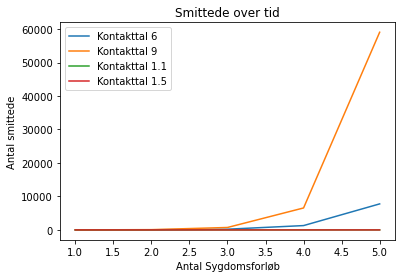

In [136]:
t = [1,2,3,4,5]
not_vac_best = np.power([6,6,6,6,6],[1,2,3,4,5])
not_vac_worst = np.power([9,9,9,9,9],[1,2,3,4,5])
vac_incidens_1100 = np.power([1.1,1.1,1.1,1.1,1.1],[1,2,3,4,5])
vac_incidens_1500 = np.power([1.5,1.5,1.5,1.5,1.5],[1,2,3,4,5])

# Plot the data
plt.title("Smittede over tid")
plt.plot(t,not_vac_best, label='Kontakttal 6')
plt.plot(t,not_vac_worst, label='Kontakttal 9')
plt.plot(t,vac_incidens_1100, label='Kontakttal 1.1')
plt.plot(t,vac_incidens_1100, label='Kontakttal 1.5')
plt.legend()
plt.xlabel('Antal Sygdomsforløb')
plt.ylabel('Antal smittede')
#plt.ylim(0,5000)
plt.savefig('spredning1.png')

plt.show()

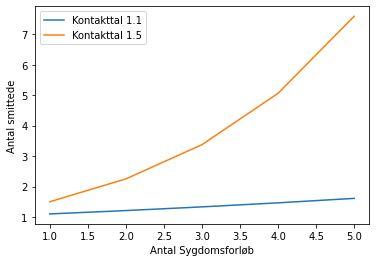

In [137]:
plt.plot(t,vac_incidens_1100, label='Kontakttal 1.1')
plt.plot(t,vac_incidens_1500, label='Kontakttal 1.5')
plt.legend()
plt.xlabel('Antal Sygdomsforløb')
plt.ylabel('Antal smittede')

plt.savefig('spredning2.png')

In [135]:
!pwd


/Users/au263437/workspace/py/HandsOnSignalAnalysisWPython


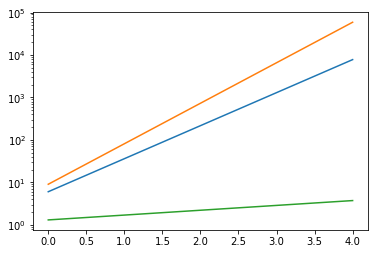

In [123]:
np.power([6,6,6,6,6],[1,2,3,4,5])
not_vac_best = np.power([6,6,6,6,6],[1,2,3,4,5])
not_vac_worst = np.power([9,9,9,9,9],[1,2,3,4,5])
vac_incidens_1300 = np.power([1.3,1.3,1.3,1.3,1.3],[1,2,3,4,5])

# Plot the data
plt.plot(not_vac_best, label='een vacc. smitter 1.3')
plt.plot(not_vac_worst, label='een uvacc smitter 6')
plt.plot(vac_incidens_1300, label='een uvacc smitter 9')
plt.yscale('log')
plt.show()


